<a href="https://colab.research.google.com/github/IshanSawhney/BharatIntern/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/house'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/house/output.csv
/content/drive/MyDrive/house/data.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
dataset = pd.read_csv('/content/drive/MyDrive/house/output.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [12]:
dataset.shape
# dataset.head

(4600, 18)

In [13]:
# dataset.head

In [14]:
dataset.drop(['date'], axis = 1, inplace = True)
# dataset.head()

In [15]:
dataset.drop(['country'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [16]:
dataset.drop(['street', 'city'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [17]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

<Axes: xlabel='bedrooms', ylabel='price'>

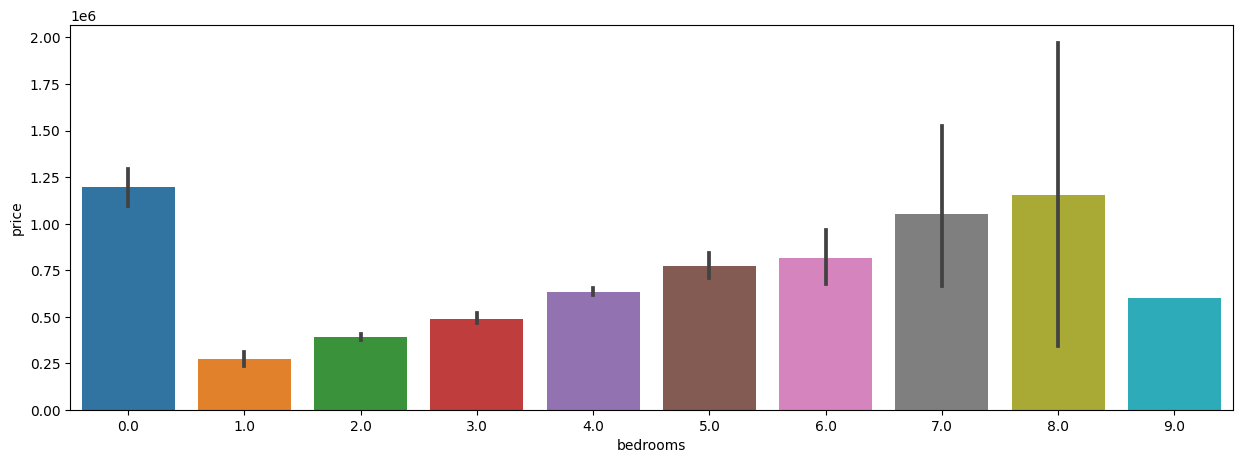

In [19]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset.bedrooms, y = dataset.price)

In [20]:
dataset.groupby('bedrooms').price.agg([len, min, max])

,len,min,max
bedrooms,,,
0.0,2,1095000.0,1295648.0
1.0,38,0.0,540000.0
2.0,566,0.0,1695000.0
3.0,2032,0.0,26590000.0
4.0,1531,0.0,4489000.0
5.0,353,0.0,7062500.0
6.0,61,0.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0


In [21]:
df = dataset[(dataset.bedrooms > 0) & (dataset.bedrooms < 9)].copy()
df.shape

(4597, 14)

In [22]:
len(df[(df.price == 0)])

49

<Axes: xlabel='bathrooms', ylabel='price'>

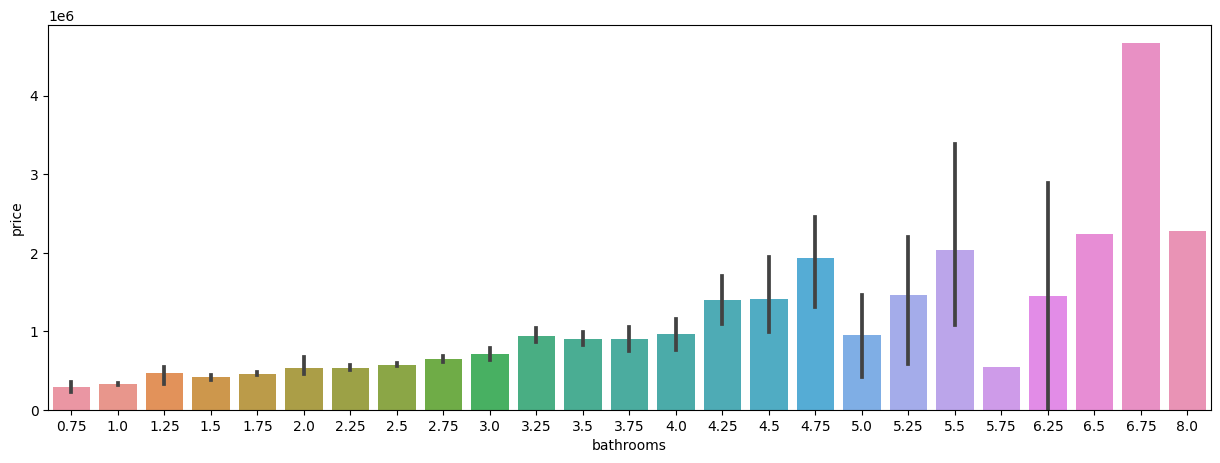

In [23]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bathrooms, y = df.price)

In [24]:
zero_price = df[(df.price == 0)].copy()
zero_price.shape

(49, 14)

<ipython-input-25-8ee1facfc87a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_price.sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

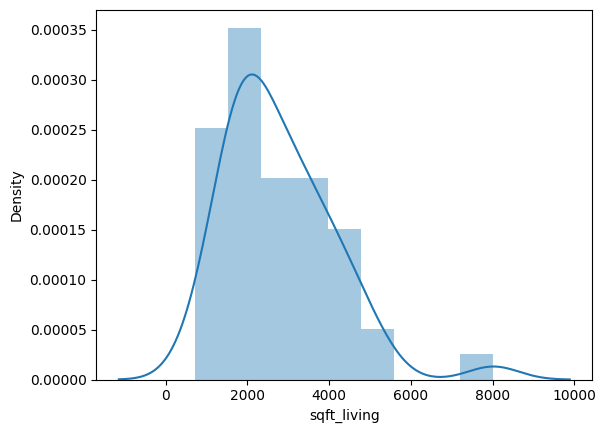

In [25]:
sns.distplot(zero_price.sqft_living)

In [26]:
zero_price.agg([min, max, 'mean', 'median'])

<ipython-input-26-2dec96c144ab>:1: FutureWarning: ['statezip'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  zero_price.agg([min, max, 'mean', 'median'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,WA 98001
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,WA 98199
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN


In [27]:
sim_from_ori = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)].copy()
sim_from_ori.shape

(79, 14)

In [28]:
sim_from_ori.price.mean()

735475.0370705189

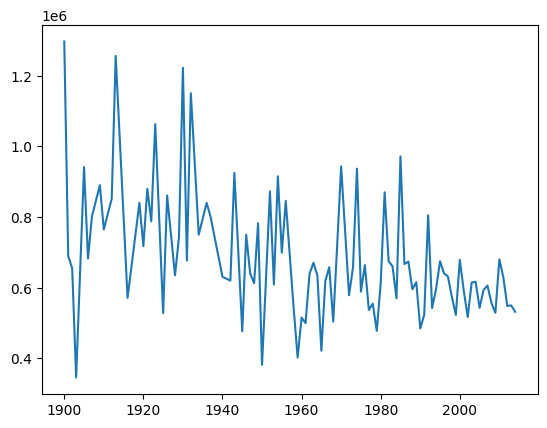

In [29]:
yr_sqft = df[(df.sqft_living > 2499) & (df.sqft_living < 2900)].copy()
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

plt.plot(yr_price_avg)

In [30]:
df.price.replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df.price == 0)])

0

In [31]:
df.drop(['sqft_above'], axis = 1, inplace = True)
df.shape

(4597, 13)

In [32]:
df = df.reset_index()
# df.info()

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['statezip_encoded'] = le.fit_transform(df.statezip)
# df.head()

In [34]:
df.statezip_encoded.value_counts()

47    147
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: statezip_encoded, Length: 77, dtype: int64

In [35]:
df.drop(['statezip'], axis = 1, inplace = True)
# df.head

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [37]:
ohc_df = pd.DataFrame(ohc.fit_transform(df[['statezip_encoded']]).toarray())
# ohc_df = ohc_df.astype(int)
# ohc_df.head()

In [38]:
df = df.join(ohc_df)

In [39]:
df.drop(['statezip_encoded'], axis = 1, inplace = True)
# df.info

In [40]:
df.shape

(4597, 90)

In [41]:
X = df.iloc[:, 1:]
X.shape

(4597, 89)

In [42]:
X.columns = X.columns.astype(str)

In [43]:
y = df.price

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


In [46]:
print(len(X_train) / len(df))

0.8999347400478573


In [47]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


In [48]:
print(len(X_train))
print(len(X_val))
print(len(X_val))


4137
230
230


In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [50]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
rmse

1.5074157166593462e-09

In [52]:
# y_val.head(10)

In [53]:
# y_pred

In [54]:
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse

3.420124090612217e-10

In [55]:
lin_reg.score(X_test, y_test)

1.0

In [56]:
# y_test

In [57]:
# y_pred_test

In [58]:
y_pred = lin_reg.predict(X_train)

In [59]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 2.1922361801414673e-10
MSE: 1.450120170561726e-19
RMSE: 3.808044341340744e-10


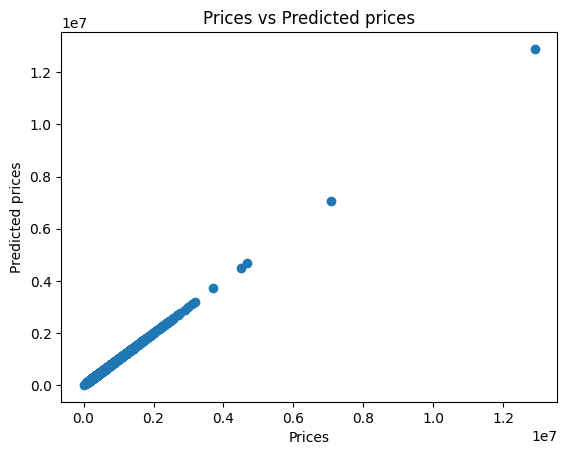

In [60]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

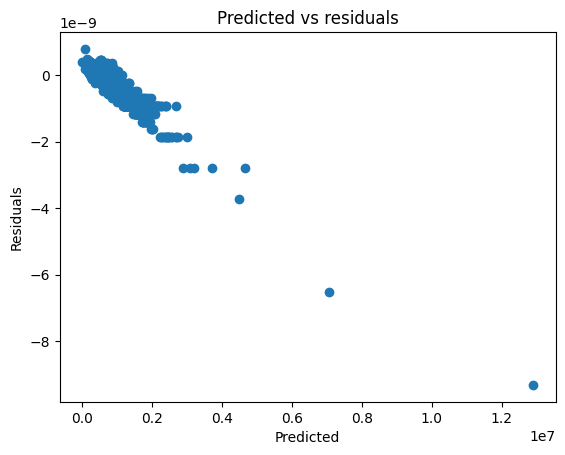

In [61]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<ipython-input-62-3959bf587b5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


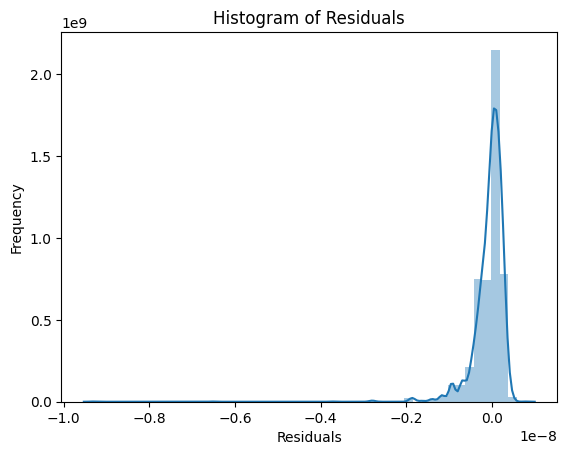

In [62]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()